In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:white">Loading the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

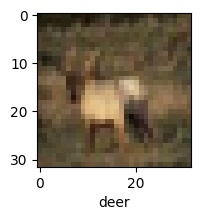

In [10]:
plot_sample(X_train, y_train, 3)

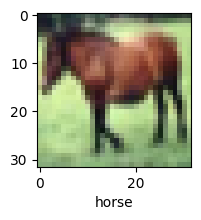

In [11]:
plot_sample(X_train, y_train, 7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:white">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:white">Building simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8131 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6246 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5413 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4806 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4300 - accuracy: 0.4954


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.54      0.57      1000
           1       0.52      0.74      0.61      1000
           2       0.37      0.35      0.36      1000
           3       0.42      0.21      0.28      1000
           4       0.30      0.61      0.41      1000
           5       0.42      0.35      0.38      1000
           6       0.60      0.34      0.43      1000
           7       0.49      0.61      0.55      1000
           8       0.67      0.55      0.61      1000
           9       0.60      0.47      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



<h4 style="color:white">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4416 - accuracy: 0.4848
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0984 - accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9725 - accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8891 - accuracy: 0.6941
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8208 - accuracy: 0.7142
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7594 - accuracy: 0.7372
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7101 - accuracy: 0.7527
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6641 - accuracy: 0.7696
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6175 - accuracy: 0.7853
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.581

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9554 - accuracy: 0.6984


[0.9554107189178467, 0.6984000205993652]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.06736589e-02, 1.39099415e-04, 1.61249924e-03, 9.67342794e-01,
        7.34766872e-05, 1.11826034e-02, 4.60938085e-03, 1.21080075e-06,
        4.17078659e-03, 1.94465305e-04],
       [1.14365503e-04, 7.26775313e-03, 1.16170682e-08, 3.19147091e-08,
        5.73647907e-10, 2.16586096e-10, 2.67123379e-10, 4.08737355e-09,
        9.91984904e-01, 6.33007614e-04],
       [1.19547039e-01, 4.71178703e-02, 2.94548157e-03, 2.47642882e-02,
        9.60138347e-03, 1.55474630e-03, 1.95744768e-04, 1.08456396e-01,
        6.38190508e-01, 4.76265699e-02],
       [9.80162859e-01, 3.27324867e-03, 8.88776151e-04, 7.53481345e-06,
        1.29618740e-04, 3.17168758e-09, 1.05713749e-08, 1.44113619e-06,
        1.55327991e-02, 3.74453066e-06],
       [3.44243881e-06, 8.95935591e-06, 1.65990610e-02, 4.84539662e-03,
        9.62876678e-02, 4.20068573e-05, 8.82210791e-01, 6.77609080e-08,
        2.58088494e-06, 3.81283449e-08]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

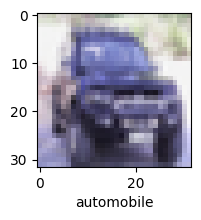

In [22]:
plot_sample(X_test, y_test,9)